In [1]:
import pandas as pd #para manejar el dataframe
import numpy as np #para abrir el csv
import matplotlib.pyplot as plt #para graficar 
import sklearn as sk #para normalizar los datos
from sklearn.cluster import KMeans

In [2]:
path = 'C:/Users/sala5/Desktop/persona.csv'
df = pd.read_csv(path, encoding='latin', low_memory=False)
df.head()

,ï»¿folioviv,foliohog,id_pobla,edad,nacio_dia,nacio_mes,sexo,parentesco,asiste_esc,tipo_esc,...,act_quehac,act_estudi,act_discap,act_otra,num_trabaj,subor,indep,personal,pago,contrato
0,100006018,1,1,60,01,08,1,1,2,,...,,,,,,,,,,
1,100006018,1,2,62,01,06,2,2,2,,...,3,,,,,,,,,
2,100006018,1,3,30,01,08,1,3,2,,...,,,,,1,2,1,2,,
3,100006018,1,4,24,01,11,2,3,2,,...,3,,,,,,,,,
4,100006037,1,1,60,11,12,1,1,2,,...,,,,,1,1,,,1,2


In [4]:
df.drop('ï»¿folioviv', axis=1, inplace=True)

In [5]:
df = df.convert_objects(convert_numeric=True)

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


In [6]:
df.dtypes

foliohog        int64
id_pobla        int64
edad            int64
nacio_dia     float64
nacio_mes     float64
sexo            int64
parentesco      int64
asiste_esc    float64
tipo_esc      float64
turno_esc     float64
tiene_beca    float64
otorg_beca    float64
forma_beca    float64
no_asiste     float64
grado_inst    float64
nivel_inst    float64
residencia    float64
alfabetism    float64
edo_conyug    float64
trabajo_sp    float64
motivo_aus    float64
act_buscot    float64
act_pensio    float64
act_quehac    float64
act_estudi    float64
act_discap    float64
act_otra      float64
num_trabaj    float64
subor         float64
indep         float64
personal      float64
pago          float64
contrato      float64
dtype: object

In [7]:
df.fillna(99, inplace = True)


In [8]:
df
df = df.astype('int64')

In [9]:
n = df.columns.values.tolist()
m = round(df.shape[0]*.50)
l = []
for i in n:
    if df[i].value_counts().get(99) != None:
        if m < df[i].value_counts().get(99):
            l.append(i)
            df = df.drop(i, 1)

In [10]:
df

,foliohog,id_pobla,edad,nacio_dia,nacio_mes,sexo,parentesco,asiste_esc,grado_inst,nivel_inst,residencia,alfabetism,edo_conyug,trabajo_sp
0,1,1,60,1,8,1,1,2,6,2,1,1,6,2
1,1,2,62,1,6,2,2,2,6,2,1,1,6,2
2,1,3,30,1,8,1,3,2,3,3,1,1,5,1
3,1,4,24,1,11,2,3,2,6,2,1,1,5,2
4,1,1,60,11,12,1,1,2,3,3,1,1,3,1
5,1,2,43,3,7,1,8,2,2,2,1,2,2,2
6,1,1,60,25,10,1,1,2,5,10,1,1,6,1
7,1,2,55,26,4,2,2,2,2,4,1,1,6,2
8,1,1,79,27,9,1,1,2,2,3,1,1,6,1
9,1,2,76,7,8,2,2,2,2,6,1,1,6,2


In [11]:
df.nacio_dia.value_counts()

15    7991
10    7763
20    7677
1     7611
12    7560
28    7425
2     7421
8     7316
5     7305
24    7277
3     7252
25    7219
22    7159
16    7142
7     7137
13    7110
17    7110
18    7105
6     7088
4     7082
23    7020
11    6975
27    6955
19    6944
9     6910
14    6896
21    6751
26    6560
30    6548
29    6371
31    3725
99      31
Name: nacio_dia, dtype: int64

El valor que contenia esa tabla era &, por lo que se sutituyo por un 99 el cual para no tener problemas en el clustering y es categorico-por lo que no se puede dar un promedio ya que son dias, se utilizara una categoria dentro de un rango cercano a los que ya estan = 33 el cual equivaldra a no se genero informacion.. 

In [12]:
df['nacio_dia'].replace({99:33}, inplace= True)

In [13]:
df.nacio_mes.value_counts()

8     19671
9     19204
10    19104
7     18472
1     18394
12    18338
5     18013
3     17943
11    17894
6     17834
4     16974
2     16564
99       31
Name: nacio_mes, dtype: int64

en este caso 13 = n/A

In [14]:
df['nacio_mes'].replace({99:12}, inplace= True)

In [15]:
df

,foliohog,id_pobla,edad,nacio_dia,nacio_mes,sexo,parentesco,asiste_esc,grado_inst,nivel_inst,residencia,alfabetism,edo_conyug,trabajo_sp
0,1,1,60,1,8,1,1,2,6,2,1,1,6,2
1,1,2,62,1,6,2,2,2,6,2,1,1,6,2
2,1,3,30,1,8,1,3,2,3,3,1,1,5,1
3,1,4,24,1,11,2,3,2,6,2,1,1,5,2
4,1,1,60,11,12,1,1,2,3,3,1,1,3,1
5,1,2,43,3,7,1,8,2,2,2,1,2,2,2
6,1,1,60,25,10,1,1,2,5,10,1,1,6,1
7,1,2,55,26,4,2,2,2,2,4,1,1,6,2
8,1,1,79,27,9,1,1,2,2,3,1,1,6,1
9,1,2,76,7,8,2,2,2,2,6,1,1,6,2


In [16]:
df.asiste_esc.value_counts()
df['asiste_esc'].replace({99:0}, inplace=True)


#En este CASO EL 0 = N/a

In [17]:
df.asiste_esc.value_counts()

2    142725
1     65177
0     10534
Name: asiste_esc, dtype: int64

In [18]:
df.grado_inst.value_counts()

3     80332
2     30862
6     25525
1     24729
4     16391
0     15890
5     14173
99    10534
Name: grado_inst, dtype: int64

7 COMO VALOR NULO

In [19]:
df['grado_inst'].replace({99:7}, inplace=True)


In [20]:
df.nivel_inst.value_counts()

2     63669
3     53175
4     31462
10    23536
0     15890
99    10534
1      9298
7      3646
8      2142
11     1939
9      1460
5       770
6       627
12      288
Name: nivel_inst, dtype: int64

valor 13 = n/a

In [21]:
df['nivel_inst'].replace({99:13}, inplace=True)


In [22]:
df.residencia.value_counts()

99    18309
15     7401
7      7153
11     7091
14     6704
12     6699
29     6689
25     6676
27     6654
16     6623
32     6616
21     6609
24     6581
9      6572
20     6403
31     6394
1      6360
10     6281
19     6093
30     6077
13     6003
18     5985
22     5964
4      5939
5      5890
26     5845
17     5660
28     5522
8      5472
2      5324
23     5207
6      5138
3      5119
33     1179
34      204
Name: residencia, dtype: int64

36 como valor nulo

In [23]:
df['residencia'].replace({99:36}, inplace=True)
df.residencia.value_counts()

36    18309
15     7401
7      7153
11     7091
14     6704
12     6699
29     6689
25     6676
27     6654
16     6623
32     6616
21     6609
24     6581
9      6572
20     6403
31     6394
1      6360
10     6281
19     6093
30     6077
13     6003
18     5985
22     5964
4      5939
5      5890
26     5845
17     5660
28     5522
8      5472
2      5324
23     5207
6      5138
3      5119
33     1179
34      204
Name: residencia, dtype: int64

In [24]:
df.head()

,foliohog,id_pobla,edad,nacio_dia,nacio_mes,sexo,parentesco,asiste_esc,grado_inst,nivel_inst,residencia,alfabetism,edo_conyug,trabajo_sp
0,1,1,60,1,8,1,1,2,6,2,1,1,6,2
1,1,2,62,1,6,2,2,2,6,2,1,1,6,2
2,1,3,30,1,8,1,3,2,3,3,1,1,5,1
3,1,4,24,1,11,2,3,2,6,2,1,1,5,2
4,1,1,60,11,12,1,1,2,3,3,1,1,3,1


In [25]:
df.alfabetism.value_counts()

1     183196
99     22236
2      13004
Name: alfabetism, dtype: int64

0 = n/a

In [26]:
df['alfabetism'].replace({99:0}, inplace=True)


In [27]:
df.edo_conyug.value_counts()

6     66070
5     58380
99    46610
1     27831
2      8847
4      7911
3      2787
Name: edo_conyug, dtype: int64

In [28]:
df['edo_conyug'].replace({99:7}, inplace=True)


In [29]:
df.trabajo_sp.value_counts()

1     102166
2      69660
99     46610
Name: trabajo_sp, dtype: int64

In [30]:
df['trabajo_sp'].replace({99:0}, inplace=True)


CREAMOS UNA NUEVA TABLA UNA VEZ QUE NORMALIZEMOS 

In [31]:
df = sk.preprocessing.normalize(df, norm='l2', axis=1, copy=True)#,return_norm=False)

df_nm = pd.DataFrame(df)

df_nm.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.016319,0.016319,0.979143,0.016319,0.130552,0.016319,0.016319,0.032638,0.097914,0.032638,0.016319,0.016319,0.097914,0.032638
1,0.015851,0.031702,0.982766,0.015851,0.095106,0.031702,0.031702,0.031702,0.095106,0.031702,0.015851,0.015851,0.095106,0.031702
2,0.031083,0.093250,0.932505,0.031083,0.248668,0.031083,0.093250,0.062167,0.093250,0.093250,0.031083,0.031083,0.155417,0.031083
3,0.035289,0.141157,0.846942,0.035289,0.388182,0.070578,0.105868,0.070578,0.211735,0.070578,0.035289,0.035289,0.176446,0.070578
4,0.016007,0.016007,0.960400,0.176073,0.192080,0.016007,0.016007,0.032013,0.048020,0.048020,0.016007,0.016007,0.048020,0.016007


APLICAMOS EL METODO DE ELBOW PARA VER CUANTOS CLUSTER APROX SERAN

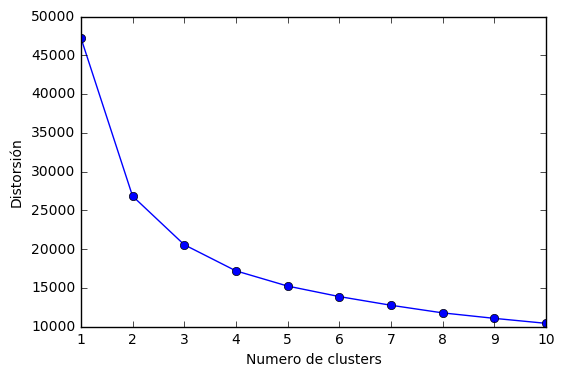

In [32]:
distortions = []

for i in range(1,11):
    km = KMeans(n_clusters=i,
                init='k-means++',
                n_init=10,
                max_iter=300,
                random_state=0)
    km.fit(df_nm)
    distortions.append(km.inertia_)

plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Numero de clusters')
plt.ylabel('Distorsión')
plt.show()

K MEANS

In [33]:
clusters = KMeans(n_clusters=4,
                    init='k-means++', 
                    max_iter=300,
                    tol=1e-04,
                    n_init=10,
                    random_state=0)

y_km = clusters.fit_predict(df_nm)
y_km

array([2, 2, 2, ..., 1, 1, 3])

In [35]:
df_nm.shape

(218436, 14)

Ward hierarchical clustering 

linkage : {“ward”, “complete”, “average”}, optional, default: “ward”

Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion.

ward minimizes the variance of the clusters being merged.
average uses the average of the distances of each observation of the two sets.
complete or maximum linkage uses the maximum distances between all observations of the two sets.


affinity : string or callable, default: “euclidean”

Metric used to compute the linkage. Can be “euclidean”, “l1”, “l2”, “manhattan”, “cosine”, or ‘precomputed’. If linkage is “ward”, only “euclidean” is accepted.

In [36]:
from sklearn.cluster import AgglomerativeClustering

In [45]:
ward = AgglomerativeClustering(n_clusters=4, 
                               affinity='euclidean', 
                               linkage='ward')

y_w = ward.fit_predict(df_nm)

MemoryError: 

In [53]:
from scipy.cluster.hierarchy import dendrogram
z = linkage(df_nm, 'ward')
denfrogram
